In [1]:
import time

import os
import pandas as pd

import matplotlib.pyplot as plt 

In [5]:
tempos = {}

In [55]:
t_counts = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 768, 1024, 1536]

In [11]:
for t in t_counts:
    tempo_local = []
    for i in range(3):
        t1 = time.time()
        os.system(f'go run main.go euler.go 30000 {t}')
        t2 = time.time()
        tf = t2 - t1
        tempo_local.append(tf)
    
    print(t, tempo_local)
    tempos[str(t)] = tempo_local 

1536 [1.8009138107299805, 1.4823100566864014, 1.5063719749450684]


In [52]:
data = {}
data['t1'] = []
data['t2'] = []
data['t3'] = []
data['t_mean'] = []
data['speedup'] = []

mean_0 = (tempos['1'][0] + tempos['1'][1] + tempos['1'][2]) / 3

for i in tempos:
    data['t1'].append(tempos[i][0])
    data['t2'].append(tempos[i][1])
    data['t3'].append(tempos[i][2])
    
    mean = (tempos[i][0] + tempos[i][1] + tempos[i][2]) / 3
    
    data['t_mean'].append(mean)
    data['speedup'].append(mean_0 / mean)

In [42]:
tempos['1'] = [591.52, 591.31, 592.70]

In [31]:
l = [591.843, 296.95, 149.85, 75.37, 38.32, 19.58, 10.37, 5.74, 3.39, 2.22, 1.90, 1.62, 1.59]

In [62]:
speedups = []

for i in l:
    speedups.append(l[0]/i)

In [53]:
df = pd.DataFrame(data)
df.to_csv('stats.csv', index=False)
print(df.to_markdown(index=False))

|        t1 |        t2 |        t3 |    t_mean |   speedup |
|----------:|----------:|----------:|----------:|----------:|
|   2.12328 |   1.80568 |   1.80408 |   1.91101 |   309.701 |
|   1.62077 |   1.62628 |   1.62583 |   1.62429 |   364.37  |
|   1.80091 |   1.48231 |   1.50637 |   1.59653 |   370.706 |
| 591.52    | 591.31    | 592.7     | 591.843   |     1     |


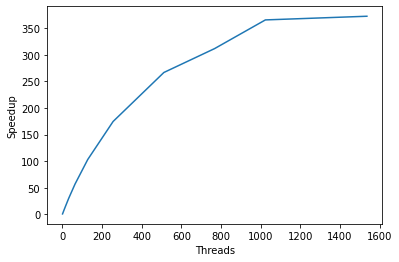

In [73]:
plt.figure()
plt.plot(t_counts, speedups)

plt.ylabel('Speedup')
plt.xlabel('Threads')

plt.savefig('speedup_plot.png')
plt.show()